imports

In [2]:
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from math import sin
import numpy as np

# Task 0

In [3]:
def foo (v1, v2):
    return 2*v1*v2/(v1+v2)

In [4]:
v1 = random.randint(0, 100)
v2 = random.randint(0, 100)
print(foo(v1, v2))

47.522935779816514


# Task 1 - datasets generation

## Linear regression

In [5]:
def foo_to_clasify(x, y):
    if x-0.5>y:
        return -1
    elif x+0.5 < y:
        return 1
    else:
        return random.choice([-1, 1])

In [6]:
dataset = []
size = 1000
for _ in range(size):
    x = random.uniform(0, 10)
    y = random.uniform(0, 10)
    dataset.append([x, y, foo_to_clasify(x, y)])
    
df_linear = pd.DataFrame(dataset, columns=["v1", "v2", "res"])


In [7]:
def draw(df_linear):    
    uper_df = df_linear[(df_linear["res"] == 1)]
    x = uper_df["v1"]
    y = uper_df["v2"]
    labels = uper_df["res"]
    plt.plot(x, y, ".")

    lower_df = df_linear[(df_linear["res"] == -1)]
    x = lower_df["v1"]
    y = lower_df["v2"]
    labels = lower_df["res"]
    plt.plot(x, y, "^")

    plt.show()

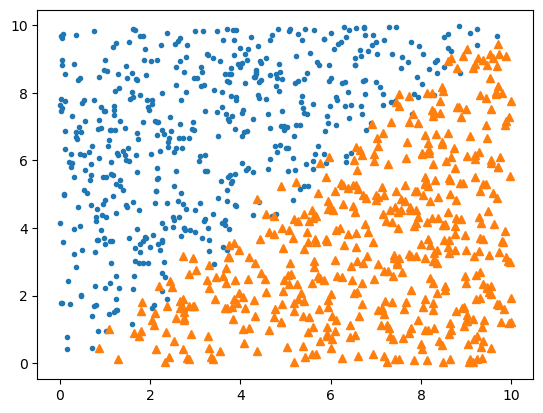

In [8]:
draw(df_linear)

## Logistic Regression

In [9]:
def foo_to_clasify_logistic(x, y):
    if sin((x/5 -1)*1.59)>y/5 -1:
        return -1
    elif sin((x/5 -1)*1.59) < y/5 -1:
        return 1
    else:
        return random.choice([-1, 1])

In [10]:
dataset = []
size = 10000
for _ in range(size):
    x = random.uniform(0, 10)
    y = random.uniform(0, 10)
    dataset.append([x, y, foo_to_clasify_logistic(x, y)])
    
df_logistic = pd.DataFrame(dataset, columns=["v1", "v2", "res"])
df_logistic.to_csv("classification_dataframe.csv")

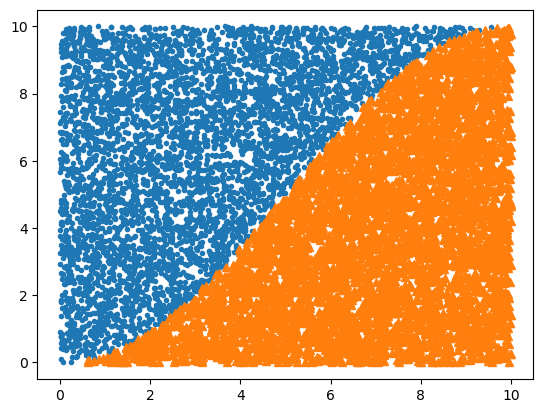

In [11]:
df_logistic = pd.read_csv('classification_dataframe.csv')

draw(df_logistic)

In [12]:
X = df_logistic.drop(["res", "Unnamed: 0"], axis=1)
y = df_logistic["res"]

In [28]:
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge(random_state=0)
reg_lasso = Lasso(random_state=0)

reg_ridge.fit(X.values, y.values)
reg_lasso.fit(X.values, y.values)

array([1.72612137])

In [34]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(X.values, y.values)

array([0.37554494])

In [29]:
clf = LogisticRegression(random_state=0).fit(X.values, y.values)
clf.score(X.values, y.values)

0.9825

## image validation

In [30]:
def draw_model(fun):
    x_under=[]
    y_under=[]
    x_upper=[]
    y_upper=[]
    for x in np.arange(0, 10, 0.1):
        for y in np.arange(0, 10, 0.1):
            if fun(x,y) == 1:
                x_upper.append(x)
                y_upper.append(y)
            else:
                x_under.append(x)
                y_under.append(y)
                
    plt.plot(x_under, y_under, ".")
    plt.plot(x_upper, y_upper, "^")
    plt.show()

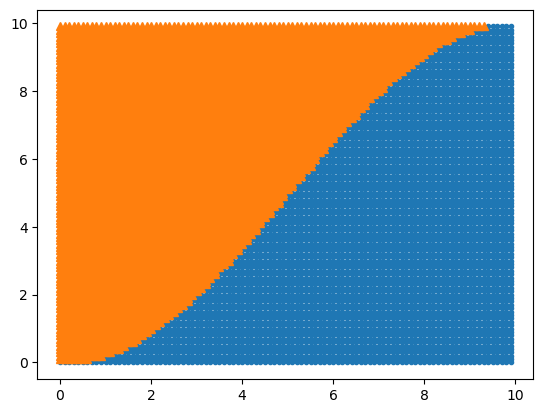

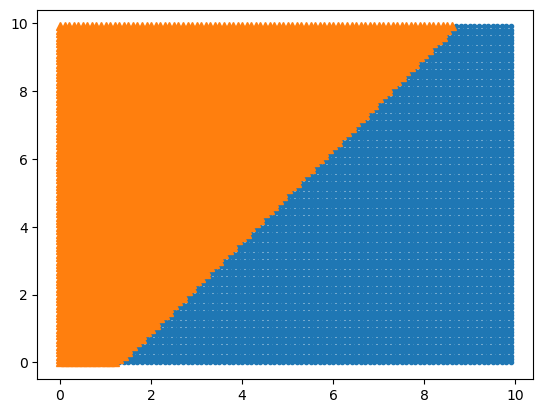

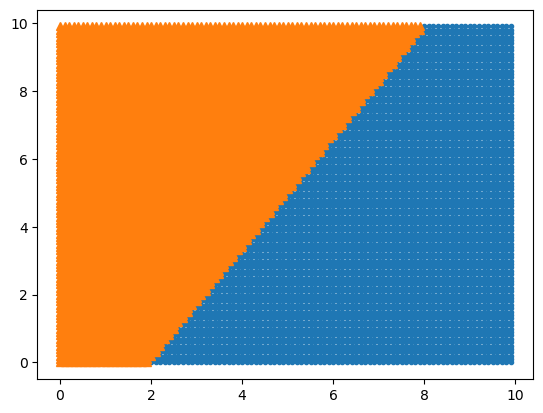

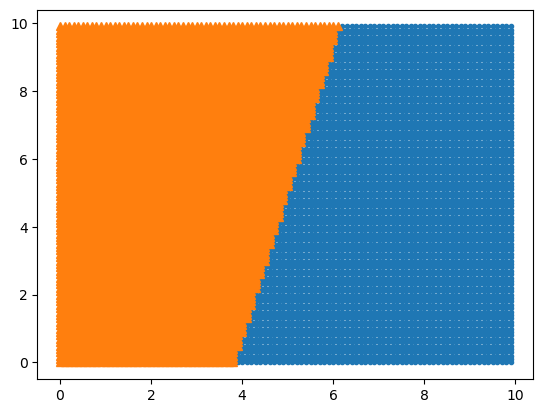

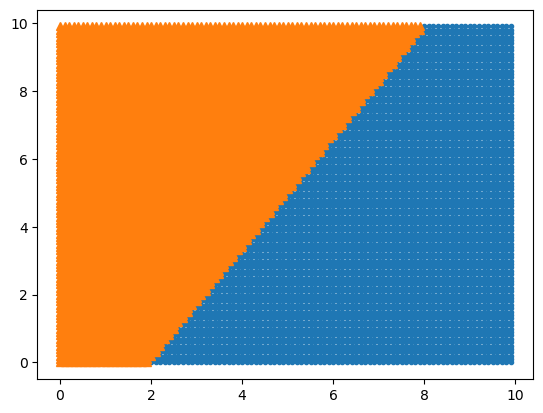

In [35]:
def predict_fun_clf(x, y):
    return clf.predict([[x,y]])
def predict_fun_ridge(x, y):
    return -1 if reg_ridge.predict([[x,y]])<0 else 1
def predict_fun_lasso(x, y):
    return -1 if reg_lasso.predict([[x,y]])<0 else 1
def predict_fun_lin(x, y):
    return -1 if lin.predict([[x,y]])<0 else 1

draw_model(foo_to_clasify_logistic)
draw_model(predict_fun_clf)
draw_model(predict_fun_ridge)
draw_model(predict_fun_lasso)
draw_model(predict_fun_lin)

## Polynomial approach

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV

poly_features = PolynomialFeatures(degree=6, interaction_only=True, include_bias=False)
poly_features.fit(X)

X_train_poly = poly_features.transform(X)

reg_ridge_cv_poly = RidgeCV(alphas=np.linspace(0.1, 100, 1000))
reg_ridge_cv_poly.fit(X_train_poly, y)

RidgeCV(alphas=array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
         7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
         8.2,   8.3,   8.4,...
        92.8,  92.9,  93. ,  93.1,  93.2,  93.3,  93.4,  93.5,  93.6,
        93.7,  93.8,  93.9,  94. ,  94.1,  94.2,  94.3,  94.4,  94.5,
        94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,
        95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.8,  96.9,  97. ,  97.1,  97.2,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. ]))

D:\Prywatne\jul\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\Prywatne\jul\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\Prywatne\jul\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\Prywatne\jul\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\Prywatne\jul\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\Prywatne\jul\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X d

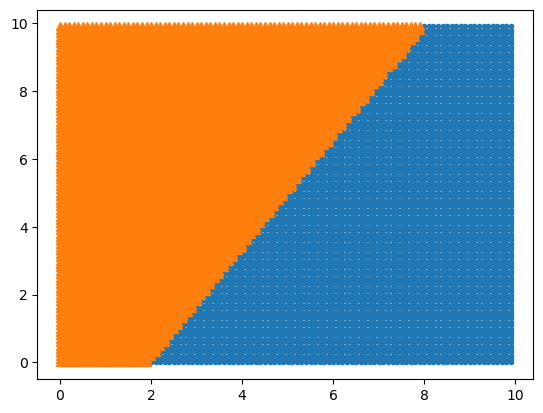

In [48]:
def poly_pred(x,y):
    return -1 if reg_ridge_cv_poly.predict(poly_features.transform([[x,y]]))<0 else 1

draw_model(poly_pred)